In [1]:
import keras
import h5py
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob

Using TensorFlow backend.


In [2]:
list_img = []
for name in glob.glob('caltech101/*'):
        path = name + '/*.*'
        for tmp in glob.glob(path):
            list_img.append(tmp)
        print name


caltech101/revolver
caltech101/flamingo
caltech101/chair
caltech101/ceiling_fan
caltech101/bonsai
caltech101/rhino
caltech101/soccer_ball
caltech101/kangaroo
caltech101/buddha
caltech101/panda
caltech101/saxophone
caltech101/mandolin
caltech101/ewer
caltech101/flamingo_head
caltech101/crocodile
caltech101/wheelchair
caltech101/bass
caltech101/pagoda
caltech101/camera
caltech101/lamp
caltech101/Faces_easy
caltech101/umbrella
caltech101/snoopy
caltech101/lobster
caltech101/dollar_bill
caltech101/grand_piano
caltech101/headphone
caltech101/cannon
caltech101/okapi
caltech101/pizza
caltech101/scissors
caltech101/platypus
caltech101/brain
caltech101/dragonfly
caltech101/trilobite
caltech101/laptop
caltech101/menorah
caltech101/brontosaurus
caltech101/beaver
caltech101/dalmatian
caltech101/airplanes
caltech101/stegosaurus
caltech101/sea_horse
caltech101/accordion
caltech101/dolphin
caltech101/binocular
caltech101/mayfly
caltech101/octopus
caltech101/stop_sign
caltech101/pyramid
caltech101/sch

In [3]:
link_img =  np.array(list_img)
print link_img.shape

(8677,)


In [4]:
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [5]:
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
def printme( num_classes ):
    if num_classes < 10:
        num_classes = '00' + str(num_classes)
    elif num_classes < 100:
        num_classes = '0' + str(num_classes)
    with open("vgg16_classes.txt") as openfile:
        for line in openfile:
            for part in line.split():
                if str(num_classes) in part:
                    print line

In [8]:
def show_img(img_path):
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [9]:
def test_img(num_img):
    img_path = link_img[num_img]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    features = model.predict(x)
    label = np.argmax(features)
    printme(label)
    
    show_img(img_path)
    
    plt.plot(features.ravel())
    plt.show()
    
    

665 moped



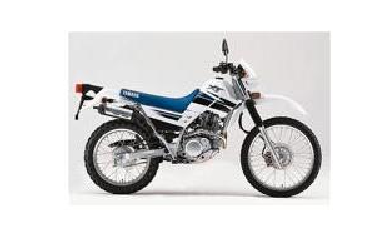

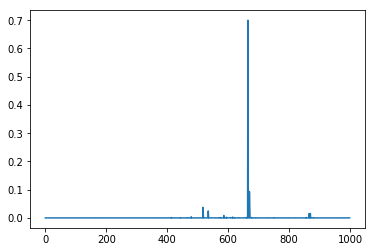

'caltech101/Motorbikes/image_0059.jpg'

In [14]:
num_rd = np.random.randint(0,len(link_img))
test_img(num_rd)
link_img[num_rd]